In [1]:
pwd

'/home/alex/gargaml/examples'

In [2]:
cd ..


/home/alex/gargaml


In [3]:
import gargaml 
from gargaml import * 
from gargaml import Data

In [5]:
X, y = Data().Load.titanic(True, precleaning=True)

In [6]:
X.drop(columns="passengerid", inplace=True)
X.sample(10)


,sex,embarked,pclass,age,sibsp,parch,fare
580,female,S,2,25.0,1,1,30.0000
732,male,S,2,NaN,0,0,0.0000
532,male,C,3,17.0,1,1,7.2292
328,female,S,3,31.0,1,1,20.5250
213,male,S,2,30.0,0,0,13.0000
713,male,S,3,29.0,0,0,9.4833
442,male,S,3,25.0,1,0,7.7750
511,male,S,3,NaN,0,0,8.0500
452,male,C,1,30.0,0,0,27.7500
342,male,S,2,28.0,0,0,13.0000


In [8]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [9]:
y.value_counts(normalize=True).round(2)

survived
0    0.62
1    0.38
Name: proportion, dtype: float64

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   embarked  889 non-null    object 
 2   pclass    891 non-null    int64  
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


<Axes: >

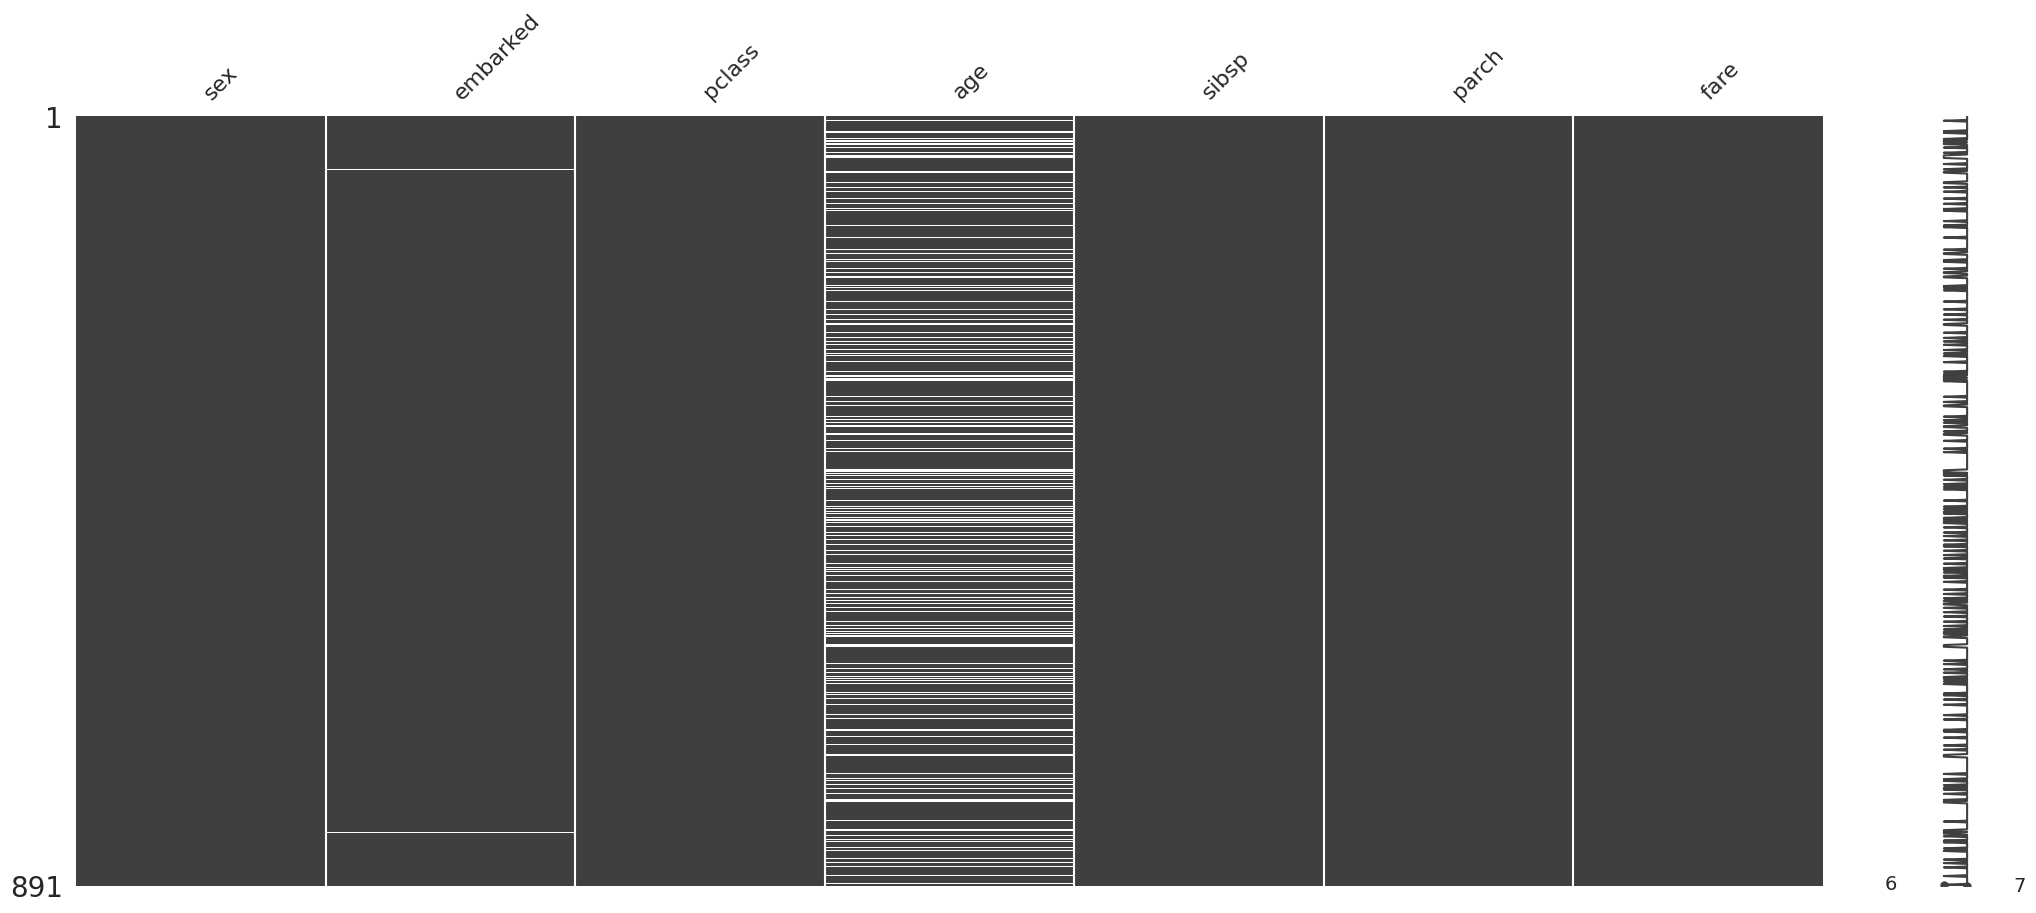

In [11]:
msno.matrix(X)

In [12]:
X.select_dtypes(include=np.number).corr().round(1)


,pclass,age,sibsp,parch,fare
pclass,1.0,-0.4,0.1,0.0,-0.5
age,-0.4,1.0,-0.3,-0.2,0.1
sibsp,0.1,-0.3,1.0,0.4,0.2
parch,0.0,-0.2,0.4,1.0,0.2
fare,-0.5,0.1,0.2,0.2,1.0


In [13]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3)

In [14]:
X_train

,sex,embarked,pclass,age,sibsp,parch,fare
345,female,S,2,24.0,0,0,13.000
232,male,S,2,59.0,0,0,13.500
497,male,S,3,NaN,0,0,15.100
250,male,S,3,NaN,0,0,7.250
720,female,S,2,6.0,0,1,33.000
...,...,...,...,...,...,...,...
558,female,S,1,39.0,1,1,79.650
292,male,C,2,36.0,0,0,12.875
18,female,S,3,31.0,1,0,18.000
462,male,S,1,47.0,0,0,38.500


In [16]:
X_train.isna().mean().round(4)

sex         0.0000
embarked    0.0032
pclass      0.0000
age         0.1926
sibsp       0.0000
parch       0.0000
fare        0.0000
dtype: float64

In [17]:
y_train

345    1
232    0
497    0
250    0
720    1
      ..
558    1
292    0
18     0
462    0
613    0
Name: survived, Length: 623, dtype: int64

In [18]:
imputer  = KNNImputer()

cols = X_train.select_dtypes(include=np.number).columns
display(cols)

X_train = imputer.fit_transform(X_train.select_dtypes(include=np.number))
X_test = imputer.transform(X_test.select_dtypes(include=np.number))
X_train

Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

array([[ 2.  , 24.  ,  0.  ,  0.  , 13.  ],
       [ 2.  , 59.  ,  0.  ,  0.  , 13.5 ],
       [ 3.  , 25.4 ,  0.  ,  0.  , 15.1 ],
       ...,
       [ 3.  , 31.  ,  1.  ,  0.  , 18.  ],
       [ 1.  , 47.  ,  0.  ,  0.  , 38.5 ],
       [ 3.  , 31.8 ,  0.  ,  0.  ,  7.75]])

In [19]:
X_train.shape

(623, 5)

In [21]:
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)
X_train

,pclass,age,sibsp,parch,fare
0,2.0,24.0,0.0,0.0,13.000
1,2.0,59.0,0.0,0.0,13.500
2,3.0,25.4,0.0,0.0,15.100
3,3.0,25.8,0.0,0.0,7.250
4,2.0,6.0,0.0,1.0,33.000
...,...,...,...,...,...
618,1.0,39.0,1.0,1.0,79.650
619,2.0,36.0,0.0,0.0,12.875
620,3.0,31.0,1.0,0.0,18.000
621,1.0,47.0,0.0,0.0,38.500


In [22]:
X_train.isna().sum()

pclass    0
age       0
sibsp     0
parch     0
fare      0
dtype: int64

In [23]:
y_train.value_counts(normalize=True).round(2)

survived
0    0.59
1    0.41
Name: proportion, dtype: float64

In [24]:
y_test.value_counts(normalize=True).round(2)

survived
0    0.67
1    0.33
Name: proportion, dtype: float64

In [25]:
estimator = LogisticRegression()
estimator.fit(X_train, y_train)

LogisticRegression()

In [26]:
estimator.score(X_train, y_train)

0.7030497592295345

In [27]:
estimator.score(X_test, y_test)

0.7014925373134329

In [38]:
scaler = Normalizer() # QuantileTransformer(n_quantiles=100)
X_train_sca = scaler.fit_transform(X_train)
X_test_sca = scaler.transform(X_test)

In [39]:
X_train_sca = pd.DataFrame(X_train_sca, columns=cols)
X_test_sca = pd.DataFrame(X_test_sca, columns=cols)
X_train_sca

,pclass,age,sibsp,parch,fare
0,0.073078,0.876941,0.000000,0.000000,0.475010
1,0.033026,0.974275,0.000000,0.000000,0.222927
2,0.101006,0.855180,0.000000,0.000000,0.508394
3,0.111248,0.956736,0.000000,0.000000,0.268850
4,0.059496,0.178489,0.000000,0.029748,0.981691
...,...,...,...,...,...
618,0.011274,0.439672,0.011274,0.011274,0.897946
619,0.052239,0.940308,0.000000,0.000000,0.336291
620,0.083366,0.861444,0.027789,0.000000,0.500193
621,0.016457,0.773486,0.000000,0.000000,0.633600


In [40]:
X_train_sca.describe().round(1)

,pclass,age,sibsp,parch,fare
count,623.0,623.0,623.0,623.0,623.0
mean,0.1,0.7,0.0,0.0,0.5
std,0.0,0.3,0.0,0.0,0.3
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.6,0.0,0.0,0.3
50%,0.1,0.9,0.0,0.0,0.5
75%,0.1,0.9,0.0,0.0,0.8
max,0.3,1.0,0.2,0.1,1.0


In [41]:
from IPython.display import display

estimator = LogisticRegression()
estimator.fit(X_train_sca, y_train)

display(estimator.score(X_train_sca, y_train))
display(estimator.score(X_test_sca, y_test))

0.6757624398073836

0.7089552238805971

In [46]:

# estimator = LogisticRegression()
# estimator.fit(X_train_sca, y_train)

# display(estimator.score(X_train_sca, np.log1p(y_train).astype(int)))
# display(estimator.score(X_test_sca, np.log1p(y_test).astype(int)))


0.6982343499197432

0.6865671641791045

In [48]:
y_train

345    1
232    0
497    0
250    0
720    1
      ..
558    1
292    0
18     0
462    0
613    0
Name: survived, Length: 623, dtype: int64

In [50]:
np.log1p(y_train).astype(int).value_counts()

survived
0    623
Name: count, dtype: int64

In [52]:
grid = GridSearchCV(LogisticRegression(), {}, cv= 10, n_jobs=-1, verbose=2, return_train_score=True)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END .................................................... total time=   0.0s[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1, param_grid={},
             return_train_score=True, verbose=2)

In [53]:
grid.best_estimator_

LogisticRegression()

In [54]:
display(grid.score(X_train, y_train))
display(grid.score(X_test, y_test))

0.7030497592295345

0.7014925373134329

In [55]:
display(grid.best_estimator_.score(X_train, y_train))
display(grid.best_estimator_.score(X_test, y_test))

0.7030497592295345

0.7014925373134329

In [56]:
grid.cv_results_

{'mean_fit_time': array([0.02192011]),
 'std_fit_time': array([0.00643271]),
 'mean_score_time': array([0.00271268]),
 'std_score_time': array([0.00038844]),
 'params': [{}],
 'split0_test_score': array([0.68253968]),
 'split1_test_score': array([0.6984127]),
 'split2_test_score': array([0.71428571]),
 'split3_test_score': array([0.69354839]),
 'split4_test_score': array([0.70967742]),
 'split5_test_score': array([0.66129032]),
 'split6_test_score': array([0.67741935]),
 'split7_test_score': array([0.67741935]),
 'split8_test_score': array([0.72580645]),
 'split9_test_score': array([0.72580645]),
 'mean_test_score': array([0.69662058]),
 'std_test_score': array([0.02093488]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.7]),
 'split1_train_score': array([0.70178571]),
 'split2_train_score': array([0.69821429]),
 'split3_train_score': array([0.69875223]),
 'split4_train_score': array([0.6969697]),
 'split5_train_score': array([0.70588235]),
 'split6_train

In [57]:
res = pd.DataFrame(grid.cv_results_).round(2)
cols = [i for i in res.columns if "split" not in i ]
res = res.loc[:, cols]
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,0.02,0.01,0.0,0.0,{},0.7,0.02,1,0.7,0.0


In [59]:
def resultize(grid) : 

    res = pd.DataFrame(grid.cv_results_).round(2)
    cols = [i for i in res.columns if "split" not in i ]
    res = res.loc[:, cols]

    return res.sort_values("mean_test_score", ascending=False)



In [60]:

resultize(grid)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,0.02,0.01,0.0,0.0,{},0.7,0.02,1,0.7,0.0


In [61]:
pipe = Pipeline(
  [
    ("imputer", KNNImputer()), 
    ("scaler", StandardScaler()), 
    ("estimator", LogisticRegression())
  
  ]
)

pipe

Pipeline(steps=[('imputer', KNNImputer()), ('scaler', StandardScaler()),
                ('estimator', LogisticRegression())])

In [63]:
grid = GridSearchCV(pipe, {}, cv= 10, n_jobs=-1, verbose=2, return_train_score=True)
grid.fit(X.select_dtypes(include=np.number) ,y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imputer', KNNImputer()),
                                       ('scaler', StandardScaler()),
                                       ('estimator', LogisticRegression())]),
             n_jobs=-1, param_grid={}, return_train_score=True, verbose=2)

In [64]:
resultize(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,0.03,0.01,0.01,0.01,{},0.7,0.04,1,0.7,0.01


In [66]:
li = [
    ("imputer", KNNImputer()), 
    ("scaler", StandardScaler()), 
    ("estimator", LogisticRegression())
  ]

pipe = Pipeline(li)
pipe

Pipeline(steps=[('imputer', KNNImputer()), ('scaler', StandardScaler()),
                ('estimator', LogisticRegression())])

In [67]:
param_grid = {
    "imputer"  : [KNNImputer(), SimpleImputer(strategy="mean"), SimpleImputer(strategy="median")]
}
param_grid

{'imputer': [KNNImputer(), SimpleImputer(), SimpleImputer(strategy='median')]}

In [68]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv= 10, n_jobs=-1, verbose=2, return_train_score=True)
grid.fit(X.select_dtypes(include=np.number),y)
resultize(grid)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END ...............................imputer=KNNImputer(); total time=   0.0s
[CV] END ...............................imputer=KNNImputer(); total time=   0.1s
[CV] END ...............................imputer=KNNImputer(); total time=   0.1s
[CV] END ...............................imputer=KNNImputer(); total time=   0.1s
[CV] END ...............................imputer=KNNImputer(); total time=   0.1s
[CV] END ............................imputer=SimpleImputer(); total time=   0.0s
[CV] END ...............................imputer=KNNImputer(); total time=   0.1s[CV] END ...............................imputer=KNNImputer(); total time=   0.0s

[CV] END ...............................imputer=KNNImputer(); total time=   0.1s
[CV] END ...............................imputer=KNNImputer(); total time=   0.0s
[CV] END ............................imputer=SimpleImputer(); total time=   0.0s
[CV] END ............................imputer=Sim

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_imputer,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,0.06,0.02,0.01,0.01,KNNImputer(),{'imputer': KNNImputer()},0.7,0.04,3,0.70,0.01
1,0.02,0.01,0.01,0.00,SimpleImputer(),{'imputer': SimpleImputer()},0.7,0.03,1,0.70,0.00
2,0.01,0.00,0.00,0.00,SimpleImputer(strategy='median'),{'imputer': SimpleImputer(strategy='median')},0.7,0.03,1,0.71,0.00


In [69]:
param_grid = {
    "imputer"  : [KNNImputer(), SimpleImputer()],
    "scaler" : [StandardScaler(), Normalizer(), QuantileTransformer(n_quantiles=100), MinMaxScaler(), "passthrough"]
}
param_grid

{'imputer': [KNNImputer(), SimpleImputer()],
 'scaler': [StandardScaler(),
  Normalizer(),
  QuantileTransformer(n_quantiles=100),
  MinMaxScaler(),
  'passthrough']}

In [70]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv= 10, n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(X.select_dtypes(include=np.number), y)
resultize(grid)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
7,0.02,0.00,0.00,0.00,SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'imputer': SimpleImputer(), 'scaler': Quantil...",0.71,0.06,1,0.71,0.01
0,0.03,0.01,0.01,0.00,KNNImputer(),StandardScaler(),"{'imputer': KNNImputer(), 'scaler': StandardSc...",0.70,0.04,8,0.70,0.01
2,0.05,0.02,0.01,0.00,KNNImputer(),QuantileTransformer(n_quantiles=100),"{'imputer': KNNImputer(), 'scaler': QuantileTr...",0.70,0.06,2,0.71,0.01
3,0.04,0.01,0.01,0.00,KNNImputer(),MinMaxScaler(),"{'imputer': KNNImputer(), 'scaler': MinMaxScal...",0.70,0.04,4,0.71,0.01
4,0.04,0.01,0.01,0.00,KNNImputer(),passthrough,"{'imputer': KNNImputer(), 'scaler': 'passthrou...",0.70,0.04,7,0.70,0.01
5,0.01,0.00,0.00,0.00,SimpleImputer(),StandardScaler(),"{'imputer': SimpleImputer(), 'scaler': Standar...",0.70,0.03,5,0.70,0.00
8,0.02,0.01,0.00,0.00,SimpleImputer(),MinMaxScaler(),"{'imputer': SimpleImputer(), 'scaler': MinMaxS...",0.70,0.04,3,0.71,0.01
9,0.02,0.01,0.00,0.00,SimpleImputer(),passthrough,"{'imputer': SimpleImputer(), 'scaler': 'passth...",0.70,0.03,5,0.71,0.00
1,0.03,0.01,0.01,0.01,KNNImputer(),Normalizer(),"{'imputer': KNNImputer(), 'scaler': Normalizer()}",0.69,0.06,10,0.69,0.01
6,0.02,0.00,0.00,0.00,SimpleImputer(),Normalizer(),"{'imputer': SimpleImputer(), 'scaler': Normali...",0.69,0.06,9,0.69,0.01


In [71]:
param_grid = {
    # "imputer"  : [KNNImputer(), SimpleImputer()],
    # "scaler" : [StandardScaler(), Normalizer(), QuantileTransformer(n_quantiles=100), "passthrough"],  # MinMaxScaler()
    "estimator" : [DummyClassifier(), LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier()]
}
param_grid

{'estimator': [DummyClassifier(),
  LogisticRegression(),
  KNeighborsClassifier(),
  RandomForestClassifier()]}

In [72]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv= 10, n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(X.select_dtypes(include=np.number), y)
resultize(grid)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
1,0.03,0.01,0.01,0.01,LogisticRegression(),{'estimator': LogisticRegression()},0.70,0.04,1,0.70,0.01
3,0.35,0.07,0.02,0.00,RandomForestClassifier(),{'estimator': RandomForestClassifier()},0.69,0.03,2,0.96,0.00
2,0.02,0.01,0.01,0.00,KNeighborsClassifier(),{'estimator': KNeighborsClassifier()},0.68,0.04,3,0.79,0.01
0,0.03,0.01,0.01,0.00,DummyClassifier(),{'estimator': DummyClassifier()},0.62,0.00,4,0.62,0.00


In [74]:
param_grid = {
    "imputer"  : [KNNImputer(), SimpleImputer()],
    "scaler" : [StandardScaler(), Normalizer(), QuantileTransformer(n_quantiles=100), "passthrough"],  # MinMaxScaler()
    "estimator" : [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier()] # DummyClassifier()
}
param_grid

{'imputer': [KNNImputer(), SimpleImputer()],
 'scaler': [StandardScaler(),
  Normalizer(),
  QuantileTransformer(n_quantiles=100),
  'passthrough'],
 'estimator': [LogisticRegression(),
  KNeighborsClassifier(),
  RandomForestClassifier()]}

In [75]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv= 10, n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(X.select_dtypes(include=np.number),y)
resultize(grid).sort_values("mean_test_score", ascending=False).head()

Fitting 10 folds for each of 24 candidates, totalling 240 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
6,0.02,0.01,0.01,0.01,LogisticRegression(),SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': LogisticRegression(), 'imputer':...",0.71,0.06,1,0.71,0.01
0,0.02,0.00,0.01,0.00,LogisticRegression(),KNNImputer(),StandardScaler(),"{'estimator': LogisticRegression(), 'imputer':...",0.70,0.04,9,0.70,0.01
20,0.37,0.05,0.03,0.01,RandomForestClassifier(),SimpleImputer(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'imput...",0.70,0.03,7,0.96,0.00
14,0.02,0.01,0.01,0.01,KNeighborsClassifier(),SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': KNeighborsClassifier(), 'imputer...",0.70,0.05,6,0.79,0.00
7,0.03,0.01,0.00,0.00,LogisticRegression(),SimpleImputer(),passthrough,"{'estimator': LogisticRegression(), 'imputer':...",0.70,0.03,4,0.71,0.00


In [76]:
resultize(grid).sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
6,0.02,0.01,0.01,0.01,LogisticRegression(),SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': LogisticRegression(), 'imputer':...",0.71,0.06,1,0.71,0.01
0,0.02,0.00,0.01,0.00,LogisticRegression(),KNNImputer(),StandardScaler(),"{'estimator': LogisticRegression(), 'imputer':...",0.70,0.04,9,0.70,0.01
20,0.37,0.05,0.03,0.01,RandomForestClassifier(),SimpleImputer(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'imput...",0.70,0.03,7,0.96,0.00
14,0.02,0.01,0.01,0.01,KNeighborsClassifier(),SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': KNeighborsClassifier(), 'imputer...",0.70,0.05,6,0.79,0.00
7,0.03,0.01,0.00,0.00,LogisticRegression(),SimpleImputer(),passthrough,"{'estimator': LogisticRegression(), 'imputer':...",0.70,0.03,4,0.71,0.00
12,0.01,0.00,0.01,0.00,KNeighborsClassifier(),SimpleImputer(),StandardScaler(),"{'estimator': KNeighborsClassifier(), 'imputer...",0.70,0.04,3,0.80,0.01
2,0.03,0.01,0.01,0.01,LogisticRegression(),KNNImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': LogisticRegression(), 'imputer':...",0.70,0.06,2,0.71,0.01
3,0.04,0.01,0.01,0.01,LogisticRegression(),KNNImputer(),passthrough,"{'estimator': LogisticRegression(), 'imputer':...",0.70,0.04,8,0.70,0.01
4,0.01,0.00,0.00,0.00,LogisticRegression(),SimpleImputer(),StandardScaler(),"{'estimator': LogisticRegression(), 'imputer':...",0.70,0.03,4,0.70,0.00
1,0.04,0.01,0.01,0.01,LogisticRegression(),KNNImputer(),Normalizer(),"{'estimator': LogisticRegression(), 'imputer':...",0.69,0.06,14,0.69,0.01


In [78]:
pd.get_dummies(X)

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,19.0,0,0,30.0000,True,False,False,False,True
888,3,NaN,1,2,23.4500,True,False,False,False,True
889,1,26.0,0,0,30.0000,False,True,True,False,False


In [79]:
pipe

Pipeline(steps=[('imputer', KNNImputer()), ('scaler', StandardScaler()),
                ('estimator', LogisticRegression())])

In [80]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv= 10, n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(pd.get_dummies(X),y)
resultize(grid)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


/home/alex/gargaml/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alex/gargaml/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
22,0.38,0.09,0.02,0.00,RandomForestClassifier(),SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.04,6,0.98,0.00
20,0.37,0.08,0.03,0.01,RandomForestClassifier(),SimpleImputer(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.04,2,0.98,0.00
19,0.42,0.08,0.03,0.01,RandomForestClassifier(),KNNImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.04,5,0.98,0.00
18,0.34,0.06,0.03,0.01,RandomForestClassifier(),KNNImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.04,3,0.98,0.00
16,0.41,0.08,0.03,0.01,RandomForestClassifier(),KNNImputer(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.05,1,0.98,0.00
8,0.02,0.01,0.02,0.00,KNeighborsClassifier(),KNNImputer(),StandardScaler(),"{'estimator': KNeighborsClassifier(), 'imputer...",0.81,0.03,7,0.86,0.00
14,0.02,0.00,0.01,0.01,KNeighborsClassifier(),SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': KNeighborsClassifier(), 'imputer...",0.81,0.04,4,0.85,0.00
0,0.03,0.01,0.01,0.00,LogisticRegression(),KNNImputer(),StandardScaler(),"{'estimator': LogisticRegression(), 'imputer':...",0.80,0.02,12,0.80,0.00
10,0.03,0.00,0.01,0.00,KNeighborsClassifier(),KNNImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': KNeighborsClassifier(), 'imputer...",0.80,0.04,11,0.85,0.01
17,0.40,0.04,0.03,0.00,RandomForestClassifier(),KNNImputer(),Normalizer(),"{'estimator': RandomForestClassifier(), 'imput...",0.80,0.03,9,0.98,0.00


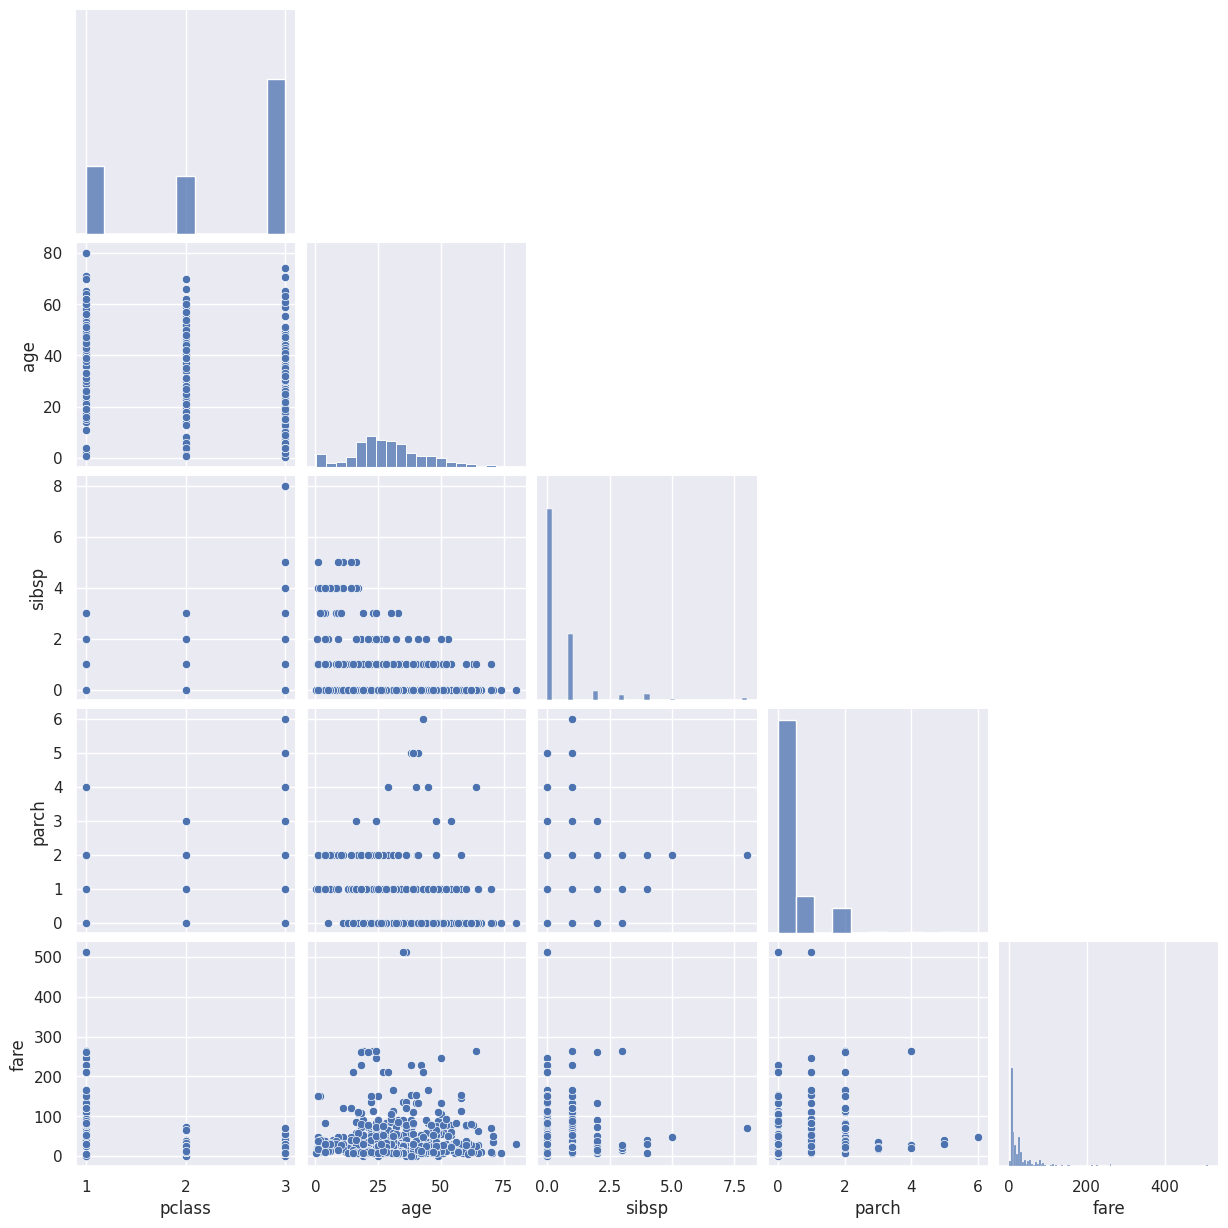

In [81]:
sns.pairplot(X, corner=True)

In [83]:
X_transf = X.copy()
X_transf["fare"] = np.log1p(X_transf["fare"])
X_transf

,sex,embarked,pclass,age,sibsp,parch,fare
0,male,S,3,22.0,1,0,2.110213
1,female,C,1,38.0,1,0,4.280593
2,female,S,3,26.0,0,0,2.188856
3,female,S,1,35.0,1,0,3.990834
4,male,S,3,35.0,0,0,2.202765
...,...,...,...,...,...,...,...
886,male,S,2,27.0,0,0,2.639057
887,female,S,1,19.0,0,0,3.433987
888,female,S,3,NaN,1,2,3.196630
889,male,C,1,26.0,0,0,3.433987


In [84]:
X

,sex,embarked,pclass,age,sibsp,parch,fare
0,male,S,3,22.0,1,0,7.2500
1,female,C,1,38.0,1,0,71.2833
2,female,S,3,26.0,0,0,7.9250
3,female,S,1,35.0,1,0,53.1000
4,male,S,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,male,S,2,27.0,0,0,13.0000
887,female,S,1,19.0,0,0,30.0000
888,female,S,3,NaN,1,2,23.4500
889,male,C,1,26.0,0,0,30.0000


In [88]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv= 10, n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(pd.get_dummies(X),y)
resultize(grid).head()

Fitting 10 folds for each of 24 candidates, totalling 240 fits


/home/alex/gargaml/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alex/gargaml/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
20,0.31,0.00,0.02,0.00,RandomForestClassifier(),SimpleImputer(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'imput...",0.82,0.04,1,0.98,0.0
23,0.33,0.10,0.02,0.01,RandomForestClassifier(),SimpleImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.05,2,0.98,0.0
22,0.41,0.11,0.03,0.01,RandomForestClassifier(),SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.04,5,0.98,0.0
19,0.42,0.08,0.03,0.00,RandomForestClassifier(),KNNImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.04,3,0.98,0.0
18,0.45,0.11,0.04,0.01,RandomForestClassifier(),KNNImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.03,8,0.98,0.0


In [89]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv= 10, n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(pd.get_dummies(X_transf),y)
resultize(grid).head()

Fitting 10 folds for each of 24 candidates, totalling 240 fits


/home/alex/gargaml/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alex/gargaml/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
20,0.38,0.06,0.03,0.01,RandomForestClassifier(),SimpleImputer(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'imput...",0.82,0.04,1,0.98,0.00
16,0.43,0.09,0.03,0.01,RandomForestClassifier(),KNNImputer(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'imput...",0.82,0.04,2,0.98,0.00
12,0.01,0.00,0.01,0.00,KNeighborsClassifier(),SimpleImputer(),StandardScaler(),"{'estimator': KNeighborsClassifier(), 'imputer...",0.81,0.04,4,0.86,0.00
11,0.02,0.00,0.02,0.01,KNeighborsClassifier(),KNNImputer(),passthrough,"{'estimator': KNeighborsClassifier(), 'imputer...",0.81,0.04,11,0.86,0.01
22,0.45,0.09,0.03,0.01,RandomForestClassifier(),SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.04,10,0.98,0.00


In [91]:
def resultize(grid, log_target=0, transf_fare=0, features="") : 
    """ """

    res = pd.DataFrame(grid.cv_results_).round(2)
    cols = [i for i in res.columns if "split" not in i ]
    res = res.loc[:, cols]

    ######################
    ######################

    res["log_target"] = log_target
    res["transf_fare"] = transf_fare
    res["features"] = features

    ######################
    ######################

    return res.sort_values("mean_test_score", ascending=False)

In [94]:
RES = pd.DataFrame()

In [95]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv= 10, n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(pd.get_dummies(X_transf),y)

res = resultize(grid, log_target=0, transf_fare=1, features="dummies")


RES = pd.concat([RES, res], axis=0, ignore_index=True)
res.head()

Fitting 10 folds for each of 24 candidates, totalling 240 fits


/home/alex/gargaml/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alex/gargaml/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score,log_target,transf_fare,features
19,0.33,0.02,0.02,0.00,RandomForestClassifier(),KNNImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'imput...",0.82,0.03,1,0.98,0.00,0,1,dummies
12,0.01,0.00,0.01,0.00,KNeighborsClassifier(),SimpleImputer(),StandardScaler(),"{'estimator': KNeighborsClassifier(), 'imputer...",0.81,0.04,4,0.86,0.00,0,1,dummies
11,0.02,0.01,0.02,0.01,KNeighborsClassifier(),KNNImputer(),passthrough,"{'estimator': KNeighborsClassifier(), 'imputer...",0.81,0.04,11,0.86,0.01,0,1,dummies
22,0.36,0.06,0.03,0.01,RandomForestClassifier(),SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.05,3,0.98,0.00,0,1,dummies
21,0.53,0.10,0.03,0.01,RandomForestClassifier(),SimpleImputer(),Normalizer(),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.05,9,0.98,0.00,0,1,dummies


grid = GridSearchCV(pipe, param_grid=param_grid, cv= 10, n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(pd.get_dummies(X_transf),y)

res = resultize(grid, log_target=0, transf_fare=1, features="dummies")
res.head()

In [97]:
RES

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score,log_target,transf_fare,features
0,0.33,0.02,0.02,0.00,RandomForestClassifier(),KNNImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'imput...",0.82,0.03,1,0.98,0.00,0,1,dummies
1,0.01,0.00,0.01,0.00,KNeighborsClassifier(),SimpleImputer(),StandardScaler(),"{'estimator': KNeighborsClassifier(), 'imputer...",0.81,0.04,4,0.86,0.00,0,1,dummies
2,0.02,0.01,0.02,0.01,KNeighborsClassifier(),KNNImputer(),passthrough,"{'estimator': KNeighborsClassifier(), 'imputer...",0.81,0.04,11,0.86,0.01,0,1,dummies
3,0.36,0.06,0.03,0.01,RandomForestClassifier(),SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.05,3,0.98,0.00,0,1,dummies
4,0.53,0.10,0.03,0.01,RandomForestClassifier(),SimpleImputer(),Normalizer(),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.05,9,0.98,0.00,0,1,dummies
5,0.41,0.05,0.03,0.01,RandomForestClassifier(),SimpleImputer(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.04,2,0.98,0.00,0,1,dummies
6,0.42,0.07,0.03,0.00,RandomForestClassifier(),KNNImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.03,7,0.98,0.00,0,1,dummies
7,0.39,0.09,0.04,0.02,RandomForestClassifier(),KNNImputer(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.04,6,0.98,0.00,0,1,dummies
8,0.02,0.00,0.01,0.00,KNeighborsClassifier(),SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': KNeighborsClassifier(), 'imputer...",0.81,0.04,7,0.85,0.00,0,1,dummies
9,0.31,0.06,0.02,0.01,RandomForestClassifier(),SimpleImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.04,10,0.98,0.00,0,1,dummies


In [100]:
RES.iloc[: ,-3: ].nunique()

log_target     1
transf_fare    1
features       1
dtype: int64

In [101]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv= 10, n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(pd.get_dummies(X),y)

res = resultize(grid, log_target=0, transf_fare=0, features="dummies")


RES = pd.concat([RES, res], axis=0, ignore_index=True)
res.head()

Fitting 10 folds for each of 24 candidates, totalling 240 fits


/home/alex/gargaml/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alex/gargaml/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score,log_target,transf_fare,features
20,0.34,0.04,0.02,0.00,RandomForestClassifier(),SimpleImputer(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'imput...",0.82,0.04,1,0.98,0.0,0,0,dummies
16,0.39,0.09,0.03,0.01,RandomForestClassifier(),KNNImputer(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'imput...",0.82,0.03,2,0.98,0.0,0,0,dummies
23,0.33,0.02,0.02,0.00,RandomForestClassifier(),SimpleImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.05,6,0.98,0.0,0,0,dummies
22,0.46,0.12,0.03,0.01,RandomForestClassifier(),SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.04,3,0.98,0.0,0,0,dummies
18,0.44,0.09,0.03,0.01,RandomForestClassifier(),KNNImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.04,4,0.98,0.0,0,0,dummies


In [102]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv= 10, n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(X.select_dtypes(include=np.number),y)

res = resultize(grid, log_target=0, transf_fare=0, features="only_num")


RES = pd.concat([RES, res], axis=0, ignore_index=True)
res.head()

Fitting 10 folds for each of 24 candidates, totalling 240 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score,log_target,transf_fare,features
6,0.02,0.01,0.01,0.01,LogisticRegression(),SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': LogisticRegression(), 'imputer':...",0.71,0.06,1,0.71,0.01,0,0,only_num
0,0.03,0.01,0.01,0.00,LogisticRegression(),KNNImputer(),StandardScaler(),"{'estimator': LogisticRegression(), 'imputer':...",0.70,0.04,8,0.70,0.01,0,0,only_num
14,0.01,0.00,0.01,0.00,KNeighborsClassifier(),SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': KNeighborsClassifier(), 'imputer...",0.70,0.05,6,0.79,0.00,0,0,only_num
7,0.04,0.01,0.00,0.00,LogisticRegression(),SimpleImputer(),passthrough,"{'estimator': LogisticRegression(), 'imputer':...",0.70,0.03,4,0.71,0.00,0,0,only_num
12,0.01,0.01,0.01,0.01,KNeighborsClassifier(),SimpleImputer(),StandardScaler(),"{'estimator': KNeighborsClassifier(), 'imputer...",0.70,0.04,3,0.80,0.01,0,0,only_num


In [103]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv= 10, n_jobs=-1, verbose=1, return_train_score=True)
_y  =np.log1p(y).astype(int)
grid.fit(X.select_dtypes(include=np.number),_y)

res = resultize(grid, log_target=1, transf_fare=0, features="only_num")


RES = pd.concat([RES, res], axis=0, ignore_index=True)
res.head()

Fitting 10 folds for each of 24 candidates, totalling 240 fits


/home/alex/gargaml/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/home/alex/gargaml/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alex/gargaml/env/lib/python3.10/site-packages/imblearn/pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/alex/gargaml/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1241, in fit
    raise Value

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score,log_target,transf_fare,features
8,0.02,0.01,0.01,0.00,KNeighborsClassifier(),KNNImputer(),StandardScaler(),"{'estimator': KNeighborsClassifier(), 'imputer...",1.0,0.0,1,1.0,0.0,1,0,only_num
9,0.02,0.01,0.01,0.00,KNeighborsClassifier(),KNNImputer(),Normalizer(),"{'estimator': KNeighborsClassifier(), 'imputer...",1.0,0.0,1,1.0,0.0,1,0,only_num
10,0.03,0.01,0.02,0.01,KNeighborsClassifier(),KNNImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': KNeighborsClassifier(), 'imputer...",1.0,0.0,1,1.0,0.0,1,0,only_num
11,0.02,0.00,0.01,0.00,KNeighborsClassifier(),KNNImputer(),passthrough,"{'estimator': KNeighborsClassifier(), 'imputer...",1.0,0.0,1,1.0,0.0,1,0,only_num
12,0.01,0.00,0.01,0.00,KNeighborsClassifier(),SimpleImputer(),StandardScaler(),"{'estimator': KNeighborsClassifier(), 'imputer...",1.0,0.0,1,1.0,0.0,1,0,only_num


In [104]:
RES.iloc[: ,-3: ].nunique()

log_target     2
transf_fare    2
features       2
dtype: int64

In [105]:
RES

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score,log_target,transf_fare,features
0,0.33,0.02,0.02,0.00,RandomForestClassifier(),KNNImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'imput...",0.82,0.03,1,0.98,0.00,0,1,dummies
1,0.01,0.00,0.01,0.00,KNeighborsClassifier(),SimpleImputer(),StandardScaler(),"{'estimator': KNeighborsClassifier(), 'imputer...",0.81,0.04,4,0.86,0.00,0,1,dummies
2,0.02,0.01,0.02,0.01,KNeighborsClassifier(),KNNImputer(),passthrough,"{'estimator': KNeighborsClassifier(), 'imputer...",0.81,0.04,11,0.86,0.01,0,1,dummies
3,0.36,0.06,0.03,0.01,RandomForestClassifier(),SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.05,3,0.98,0.00,0,1,dummies
4,0.53,0.10,0.03,0.01,RandomForestClassifier(),SimpleImputer(),Normalizer(),"{'estimator': RandomForestClassifier(), 'imput...",0.81,0.05,9,0.98,0.00,0,1,dummies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.02,0.01,0.00,0.00,LogisticRegression(),KNNImputer(),passthrough,"{'estimator': LogisticRegression(), 'imputer':...",NaN,NaN,17,NaN,NaN,1,0,only_num
92,0.01,0.01,0.00,0.00,LogisticRegression(),SimpleImputer(),StandardScaler(),"{'estimator': LogisticRegression(), 'imputer':...",NaN,NaN,17,NaN,NaN,1,0,only_num
93,0.01,0.00,0.00,0.00,LogisticRegression(),SimpleImputer(),Normalizer(),"{'estimator': LogisticRegression(), 'imputer':...",NaN,NaN,17,NaN,NaN,1,0,only_num
94,0.01,0.00,0.00,0.00,LogisticRegression(),SimpleImputer(),QuantileTransformer(n_quantiles=100),"{'estimator': LogisticRegression(), 'imputer':...",NaN,NaN,17,NaN,NaN,1,0,only_num


In [107]:
# RandomForestClassifier()	KNNImputer()	"passthrough"  "0"	"1"	"dummies"

SyntaxError: invalid syntax (1078200527.py, line 1)

In [114]:
pipe = Pipeline(
    [
        ("imputer",     KNNImputer()), 
        ("scaler",      "passthrough" ), 
        ("estimator",   RandomForestClassifier() ),
    ]
)

In [116]:
param_grid = {
    "estimator__n_estimators" : [100, 150, 200, 300, 400, 500], 
    "imputer" : [KNNImputer(),],
    "scaler" : ["passthrough",],
    "estimator" : [RandomForestClassifier(), ]
}
param_grid

{'estimator__n_estimators': [100, 150, 200, 300, 400, 500],
 'imputer': [KNNImputer()],
 'scaler': ['passthrough'],
 'estimator': [RandomForestClassifier()]}

In [117]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv= 10, n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(X.select_dtypes(include=np.number),y)
res = resultize(grid, log_target=0, transf_fare=0, features="only_num")
RES = pd.concat([RES, res], axis=0, ignore_index=True)
display(res.head())

grid = GridSearchCV(pipe, param_grid=param_grid, cv= 10, n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(pd.get_dummies(X),y)
res = resultize(grid, log_target=0, transf_fare=0, features="dummies")
RES = pd.concat([RES, res], axis=0, ignore_index=True)
display(res.head())


grid = GridSearchCV(pipe, param_grid=param_grid, cv= 10, n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(X_transf.select_dtypes(include=np.number),y)
res = resultize(grid, log_target=0, transf_fare=1, features="only_num")
RES = pd.concat([RES, res], axis=0, ignore_index=True)
display(res.head())

grid = GridSearchCV(pipe, param_grid=param_grid, cv= 10, n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(pd.get_dummies(X_transf),y)
res = resultize(grid, log_target=0, transf_fare=1, features="dummies")
RES = pd.concat([RES, res], axis=0, ignore_index=True)
display(res.head())

Fitting 10 folds for each of 6 candidates, totalling 60 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__n_estimators,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score,log_target,transf_fare,features
0,0.37,0.08,0.03,0.01,RandomForestClassifier(),100,KNNImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'estim...",0.70,0.03,1,0.96,0.0,0,0,only_num
1,0.54,0.13,0.04,0.01,RandomForestClassifier(),150,KNNImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'estim...",0.69,0.02,2,0.96,0.0,0,0,only_num
2,0.70,0.09,0.04,0.01,RandomForestClassifier(),200,KNNImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'estim...",0.69,0.03,5,0.96,0.0,0,0,only_num
3,1.03,0.17,0.06,0.01,RandomForestClassifier(),300,KNNImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'estim...",0.69,0.03,6,0.96,0.0,0,0,only_num
4,1.31,0.20,0.07,0.01,RandomForestClassifier(),400,KNNImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'estim...",0.69,0.03,4,0.96,0.0,0,0,only_num


Fitting 10 folds for each of 6 candidates, totalling 60 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__n_estimators,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score,log_target,transf_fare,features
0,0.37,0.10,0.03,0.01,RandomForestClassifier(),100,KNNImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'estim...",0.81,0.04,1,0.98,0.0,0,0,dummies
1,0.51,0.10,0.04,0.02,RandomForestClassifier(),150,KNNImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'estim...",0.81,0.04,5,0.98,0.0,0,0,dummies
2,0.72,0.12,0.04,0.00,RandomForestClassifier(),200,KNNImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'estim...",0.81,0.04,2,0.98,0.0,0,0,dummies
3,1.19,0.18,0.08,0.03,RandomForestClassifier(),300,KNNImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'estim...",0.81,0.04,3,0.98,0.0,0,0,dummies
5,1.78,0.32,0.08,0.02,RandomForestClassifier(),500,KNNImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'estim...",0.81,0.04,4,0.98,0.0,0,0,dummies


Fitting 10 folds for each of 6 candidates, totalling 60 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__n_estimators,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score,log_target,transf_fare,features
1,0.67,0.22,0.04,0.02,RandomForestClassifier(n_estimators=500),150,KNNImputer(),passthrough,{'estimator': RandomForestClassifier(n_estimat...,0.7,0.03,2,0.96,0.0,0,1,only_num
2,0.83,0.26,0.05,0.02,RandomForestClassifier(n_estimators=500),200,KNNImputer(),passthrough,{'estimator': RandomForestClassifier(n_estimat...,0.7,0.03,5,0.96,0.0,0,1,only_num
3,1.26,0.26,0.07,0.02,RandomForestClassifier(n_estimators=500),300,KNNImputer(),passthrough,{'estimator': RandomForestClassifier(n_estimat...,0.7,0.04,4,0.96,0.0,0,1,only_num
4,1.58,0.31,0.10,0.04,RandomForestClassifier(n_estimators=500),400,KNNImputer(),passthrough,{'estimator': RandomForestClassifier(n_estimat...,0.7,0.04,3,0.96,0.0,0,1,only_num
5,1.82,0.32,0.09,0.03,RandomForestClassifier(n_estimators=500),500,KNNImputer(),passthrough,{'estimator': RandomForestClassifier(n_estimat...,0.7,0.03,1,0.96,0.0,0,1,only_num


Fitting 10 folds for each of 6 candidates, totalling 60 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__n_estimators,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score,log_target,transf_fare,features
0,0.41,0.12,0.03,0.02,RandomForestClassifier(n_estimators=300),100,KNNImputer(),passthrough,{'estimator': RandomForestClassifier(n_estimat...,0.81,0.04,4,0.98,0.0,0,1,dummies
1,0.59,0.11,0.04,0.02,RandomForestClassifier(n_estimators=300),150,KNNImputer(),passthrough,{'estimator': RandomForestClassifier(n_estimat...,0.81,0.04,5,0.98,0.0,0,1,dummies
2,0.82,0.23,0.05,0.01,RandomForestClassifier(n_estimators=300),200,KNNImputer(),passthrough,{'estimator': RandomForestClassifier(n_estimat...,0.81,0.04,6,0.98,0.0,0,1,dummies
3,1.12,0.22,0.08,0.03,RandomForestClassifier(n_estimators=300),300,KNNImputer(),passthrough,{'estimator': RandomForestClassifier(n_estimat...,0.81,0.04,1,0.98,0.0,0,1,dummies
4,1.56,0.31,0.10,0.03,RandomForestClassifier(n_estimators=300),400,KNNImputer(),passthrough,{'estimator': RandomForestClassifier(n_estimat...,0.81,0.04,2,0.98,0.0,0,1,dummies


In [111]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.


In [119]:
RES = RES.loc[RES.log_target == 0]
RES.sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_imputer,param_scaler,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score,log_target,transf_fare,features,param_estimator__n_estimators
0,0.33,0.02,0.02,0.00,RandomForestClassifier(),KNNImputer(),passthrough,"{'estimator': RandomForestClassifier(), 'imput...",0.82,0.03,1,0.98,0.00,0,1,dummies,NaN
24,0.34,0.04,0.02,0.00,RandomForestClassifier(),SimpleImputer(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'imput...",0.82,0.04,1,0.98,0.00,0,0,dummies,NaN
25,0.39,0.09,0.03,0.01,RandomForestClassifier(),KNNImputer(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'imput...",0.82,0.03,2,0.98,0.00,0,0,dummies,NaN
117,1.12,0.22,0.08,0.03,RandomForestClassifier(n_estimators=300),KNNImputer(),passthrough,{'estimator': RandomForestClassifier(n_estimat...,0.81,0.04,1,0.98,0.00,0,1,dummies,300
116,0.82,0.23,0.05,0.01,RandomForestClassifier(n_estimators=300),KNNImputer(),passthrough,{'estimator': RandomForestClassifier(n_estimat...,0.81,0.04,6,0.98,0.00,0,1,dummies,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.45,0.11,0.03,0.01,RandomForestClassifier(),KNNImputer(),Normalizer(),"{'estimator': RandomForestClassifier(), 'imput...",0.67,0.04,23,0.96,0.00,0,0,only_num,NaN
70,0.46,0.11,0.03,0.02,RandomForestClassifier(),SimpleImputer(),Normalizer(),"{'estimator': RandomForestClassifier(), 'imput...",0.67,0.04,21,0.96,0.00,0,0,only_num,NaN
23,0.02,0.00,0.00,0.00,LogisticRegression(),SimpleImputer(),Normalizer(),"{'estimator': LogisticRegression(), 'imputer':...",0.67,0.02,24,0.67,0.00,0,1,dummies,NaN
22,0.04,0.01,0.01,0.00,LogisticRegression(),KNNImputer(),Normalizer(),"{'estimator': LogisticRegression(), 'imputer':...",0.67,0.02,23,0.67,0.00,0,1,dummies,NaN
